Frequentism (FQ) vs Bayesianism (BY): 

1. In FQ the data you have is one particular sample out of many that could have been. You do not have access to the population, but only a random sample from it. You describe the population by a distribution e.g. Poisson with fixed parameters (lambda). There is one true lambda, but we do not know it. We only get an estimate from a single random sample (lambda_hat). Now given any lambda, and the sample size, there is a sampling distribution for lambda_hat. From this we have recieved one draw. Now, we want to make inferences about the true lambda using this lambda_hat realization. First, we set a Null, an iron-man that we seek to knock down to prove to the scientific community our result e.g. lambda = 0. Given this Null, and sample size N, we have a sampling distribution for lamda_hat (centered around 0). Now we look at our estimate lambda_hat, and see how far is this from lambda? If it is very far, then lambda=0 can only be true in a very very rare situation. Let set a significance level of 0.05% or 1 in 20. We now can easily find lambda_upper and lambda_lower such that 95% draws of lambda_hat given lambda=0 fall within it. This 'confidence interval' means that in 95% of the worlds possible / samples possible, lambda_hat will fall in (lambda_upper,lambda_lower). If we had taken a lower significance e.g. 0.1 or 1 in 10, this range would have been narrower. If we had taken a higher significance e.g. 0.01 this range would be wider. Then we see if the lambda_hat we obtained falls in it. If it does, then we say that given lambda=0, our lambda_hat has fallen in a range of values that we would expect a hypothetical lambda_hat to fall in 95% of the times. If it does not, then we say that given lambda=0, our lambda_hat has fallen beyond a range of values that we would expect a hypothetical lambda_hat to fall in 95% of the times. It doesn't tell us if lambda=0 or not, it tells us whether our lambda_hat fell inside the likely range or not. It makes a reference to hypothetical samples to construct an interval to evaluate the current estimate. There are two types of errors possible - type 1 is false positive i.e how many times we would reject a true null (alpha/level of significance) and type 2 is false negative (beta) i.e how many times we would fail to reject a false null against a true alternative (we need to specify an alternative). Smaller effect sizes e.g. lambda = 0.01 may get rejected against lambda = 0, because of low power (1-beta) of the test. Alpha is usually chosen, but beta rises as alpha falls, samples size reduces, effect size is small (indistiguishable alternative).

2. 

### Frequentism

In [58]:
from scipy.stats import hypergeom
# We draw n items from a finite population of size N with r successes. Then X is the number of success in sample drawn.

# key parameter
phi = 0.5

# Parameters for the hypergeometric distribution
N = 16
r = int(N * phi)
n = 4

# Draw a sample from the hypergeometric distribution
sample = hypergeom.rvs(N, r, n)
print("Random Sample:", sample)

Random Sample: 3


In [59]:
# Calculate the probability mass function (PMF) of the hypergeometric distribution
for value in range(0,7):
    pmf = hypergeom.pmf(value, N, r, n)
    print("PMF of the value:", value,"is", pmf)

PMF of the value: 0 is 0.038461538461538464
PMF of the value: 1 is 0.24615384615384617
PMF of the value: 2 is 0.43076923076923074
PMF of the value: 3 is 0.24615384615384614
PMF of the value: 4 is 0.038461538461538464
PMF of the value: 5 is 0.0
PMF of the value: 6 is 0.0


In [60]:
# sample that we have:
sample = [1,1,0,1]
phi_est = sum(sample)/len(sample)
print(f'sample we have: {sample}, estimate of phi {phi_est}')

sample we have: [1, 1, 0, 1], estimate of phi 0.75


In [61]:
# Testing the null: phi = 0.25

# let true value of parameter (null)
phi = 0.25

# Parameters for the hypergeometric distribution
N = 16
r = int(N * phi)
n = 4

# Draw 1000 samples from the hypergeometric distribution
samples = [hypergeom.rvs(N, r, n) for i in range(1000)]

print(f'sample we have: {samples}')

sample we have: [0, 1, 1, 0, 2, 1, 1, 3, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 1, 1, 3, 1, 1, 2, 1, 1, 3, 1, 2, 1, 1, 1, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 3, 2, 2, 1, 1, 1, 2, 0, 1, 1, 2, 0, 1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 0, 1, 2, 1, 2, 1, 1, 0, 3, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 0, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 1, 0, 0, 2, 0, 0, 1, 3, 0, 0, 0, 1, 0, 0, 2, 2, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 2, 1, 1, 3, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 2, 1, 2, 1, 3, 1, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 3, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 0,

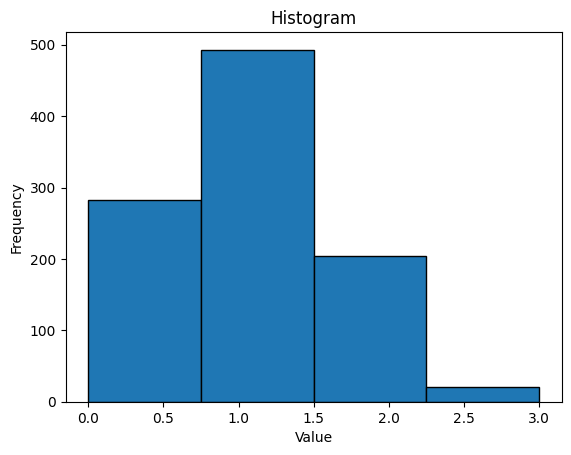

In [65]:
import matplotlib.pyplot as plt
plt.hist(samples, bins=4, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

In [66]:
# Calculate the P(X>value)
for value in range(0,7):
    rightintegral = 1-hypergeom.cdf(value-1, N, r, n)
    print("PMF of the value:", value,"is", rightintegral)

PMF of the value: 0 is 1.0
PMF of the value: 1 is 0.7280219780219781
PMF of the value: 2 is 0.24450549450549441
PMF of the value: 3 is 0.02692307692307694
PMF of the value: 4 is 0.0005494505494505475
PMF of the value: 5 is 0.0
PMF of the value: 6 is 0.0


In [69]:
print(f'sample we have: {sample}, estimate of phi {phi_est}')
print(f'null: phi = {phi}')
print(f'probability of P(X>=3|phi=0.25) = P(reject H0|H0True)', 1-hypergeom.cdf(3-1, N, r, n),', PVALUE')
print('if significance is at 0.05, then we would reject the null hypothesis! as our value is too extreme.')

sample we have: [1, 1, 0, 1], estimate of phi 0.75
null: phi = 0.75
probability of P(X>=3|phi=0.25) = P(reject H0|H0True) 0.7554945054945055 , PVALUE
if significance is at 0.05, then we would reject the null hypothesis! as our value is too extreme.


In [70]:
# Power of test for alternative Ha: phi = 0.75
# Whe the null is phi = 0.25. 

# let true value of parameter (null)
phi = 0.75

# Parameters for the hypergeometric distribution
N = 16
r = int(N * phi)
n = 4

# Draw 1000 samples from the hypergeometric distribution
samples = [hypergeom.rvs(N, r, n) for i in range(1000)]

print(f'sample we have: {samples}')

sample we have: [3, 2, 2, 3, 4, 3, 2, 3, 2, 4, 3, 2, 3, 2, 3, 3, 4, 4, 4, 4, 3, 2, 3, 3, 4, 2, 4, 3, 2, 3, 4, 4, 2, 3, 3, 3, 4, 3, 2, 2, 4, 2, 3, 3, 3, 4, 2, 4, 1, 3, 4, 3, 3, 3, 3, 2, 2, 3, 4, 2, 3, 1, 3, 4, 3, 3, 4, 2, 3, 3, 4, 4, 3, 4, 3, 3, 3, 3, 4, 2, 3, 3, 3, 3, 4, 3, 2, 2, 3, 3, 2, 2, 4, 4, 3, 4, 4, 2, 3, 4, 2, 2, 3, 3, 3, 3, 4, 4, 3, 1, 2, 4, 3, 4, 2, 3, 3, 3, 3, 4, 2, 3, 3, 3, 4, 3, 4, 4, 3, 2, 4, 4, 3, 2, 3, 1, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 3, 3, 3, 2, 4, 1, 3, 3, 3, 3, 4, 4, 3, 4, 4, 3, 2, 2, 4, 3, 2, 4, 2, 4, 2, 2, 3, 2, 3, 1, 2, 3, 3, 2, 3, 4, 2, 3, 3, 2, 4, 3, 2, 4, 3, 3, 4, 2, 3, 2, 3, 3, 3, 4, 3, 3, 4, 3, 3, 4, 2, 2, 4, 3, 4, 4, 2, 3, 3, 4, 3, 2, 3, 2, 3, 3, 4, 1, 3, 4, 2, 3, 4, 2, 4, 3, 4, 2, 3, 2, 3, 4, 3, 2, 3, 3, 3, 4, 3, 2, 3, 3, 4, 3, 4, 1, 4, 3, 3, 4, 2, 2, 1, 3, 2, 4, 4, 3, 3, 4, 2, 4, 3, 2, 3, 2, 3, 2, 4, 3, 4, 4, 3, 4, 3, 3, 3, 4, 3, 3, 3, 4, 3, 2, 3, 2, 3, 4, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 4, 3, 2, 2, 3, 3, 2, 3, 3,

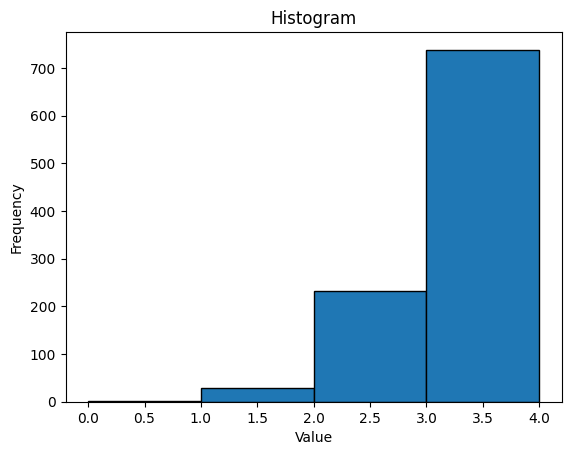

In [71]:
import matplotlib.pyplot as plt
plt.hist(samples, bins=4, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

In [72]:
# Calculate the P(X>value)
for value in range(0,7):
    rightintegral = 1-hypergeom.cdf(value-1, N, r, n)
    print("PMF of the value:", value,"is", rightintegral)

PMF of the value: 0 is 1.0
PMF of the value: 1 is 0.9994505494505495
PMF of the value: 2 is 0.9730769230769231
PMF of the value: 3 is 0.7554945054945055
PMF of the value: 4 is 0.2719780219780219
PMF of the value: 5 is 0.0
PMF of the value: 6 is 0.0


In [73]:
# Beta is P(dont reject H0|Ha is true)